# ОБНАРУЖЕНИЕ ОБЪЕКТОВ НА ИЗОБРАЖЕНИЯХ
## Петров Попов 6411

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from skimage import img_as_float
from skimage import exposure
from scipy import signal


from skimage.util import random_noise
from scipy.signal import convolve2d
from scipy.ndimage import median_filter
from skimage.io import imread, imshow, show
from skimage.metrics import normalized_root_mse
import warnings
warnings.filterwarnings('ignore')

variance = lambda image: np.mean(image ** 2) - (np.mean(image)) ** 2
variance_error =lambda image,recover_image: ((np.sum(recover_image) - np.sum(image)) ** 2) / (image.shape[0]*image.shape[1])
def plot_img(image, ax):
    """Plot an image along with its histogram and cumulative histogram.

    """
    # Преобразование изображения в формат с плавающей запятой двойной точности
    #image = img_as_float(image)

    # Display image
    ax.imshow(image, cmap='gray')

    return ax


In [2]:
obj1=np.array([[1,1,1],
               [0,1,0],
               [0,1,0]])

obj2=np.array([[0,1,0],
               [0,1,0],
               [1,1,1]])

## 1) Tолько фон. Объектов нет.

In [67]:
noise_img = abs(random_noise(np.full((64,64), -1), var=0.5))
noise_img

array([[0.45486059, 1.        , 1.        , ..., 1.        , 0.20478466,
        1.        ],
       [0.40373838, 0.86579568, 0.35605328, ..., 0.6477348 , 0.5761395 ,
        0.5788042 ],
       [0.57180217, 0.10078104, 0.68809408, ..., 0.00499362, 0.67557022,
        1.        ],
       ...,
       [0.29362164, 0.01791122, 0.57761706, ..., 1.        , 0.21594312,
        1.        ],
       [0.23366426, 0.02994905, 0.32364621, ..., 0.37947935, 1.        ,
        0.56946256],
       [0.60825471, 1.        , 0.34329433, ..., 0.56494853, 0.20982542,
        0.03737202]])

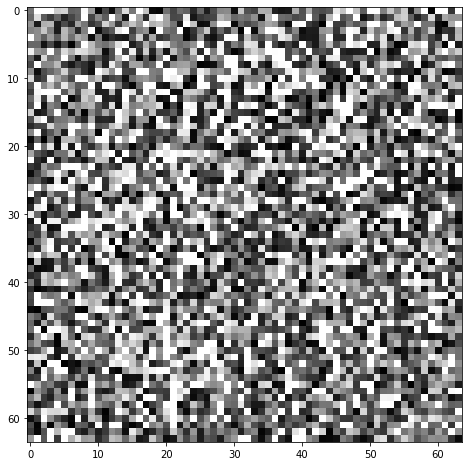

In [68]:
fig = plt.figure(figsize=(8, 8))
axes=np.zeros((1,1),dtype=object)
axes[0][0]=fig.add_subplot(111)

ax_img=plot_img(noise_img,axes[0][0])

In [69]:
corr_obj1=signal.correlate2d(noise_img.copy(), obj1, boundary='fill', mode='full')
corr_obj2=signal.correlate2d(noise_img.copy(), obj2, boundary='fill', mode='full')

In [70]:
treshhold_obj1=np.where(corr_obj1.copy() >= 5, 255, 0)
treshhold_obj2=np.where(corr_obj2.copy() >= 5, 255, 0)

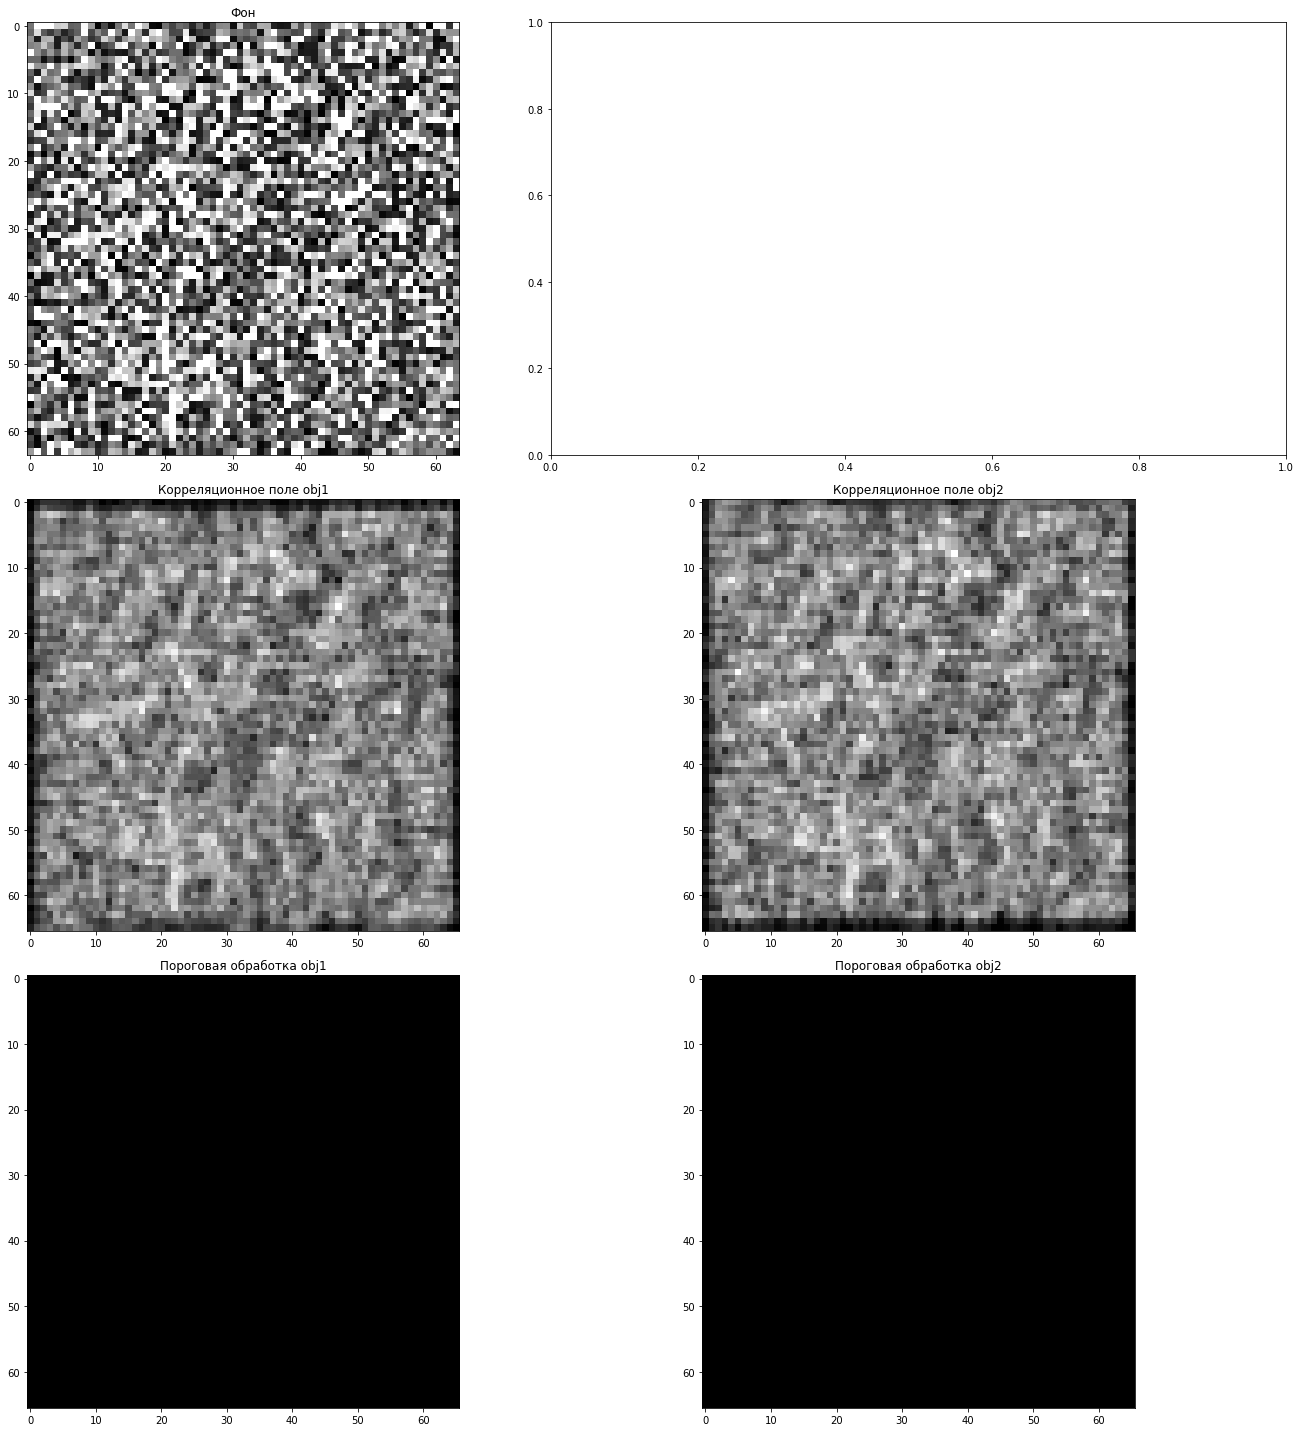

In [71]:
fig = plt.figure(figsize=(20, 20))
axes=np.zeros((3,2),dtype=object)
axes[0,0]=fig.add_subplot(321)
axes[0,1]=fig.add_subplot(322)
axes[1,0]=fig.add_subplot(323)
axes[1,1]=fig.add_subplot(324)
axes[2,0]=fig.add_subplot(325)
axes[2,1]=fig.add_subplot(326)

ax_img=plot_img(noise_img,axes[0,0])
ax_img.set_title("Фон")

ax_img=plot_img(corr_obj1,axes[1,0])
ax_img.set_title("Корреляционное поле obj1")
ax_img=plot_img(treshhold_obj1,axes[2,0])
ax_img.set_title("Пороговая обработка obj1")

ax_img=plot_img(corr_obj2,axes[1,1])
ax_img.set_title("Корреляционное поле obj2")
ax_img=plot_img(treshhold_obj2,axes[2,1])
ax_img.set_title("Пороговая обработка obj2")

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

## 2) Есть объекты одного типа.

In [72]:
def apply_a_mask(img,mask,count_obj):
    import random
    for i in range(count_obj):
        y, x = random.randint(0, img.shape[0] - 3), random.randint(0, img.shape[1] - 3)
        img[y:y+3,x:x+3]=mask
    return img

In [73]:
noise_with_obj=apply_a_mask(noise_img.copy(),obj1,5)

In [74]:
corr_obj1=signal.correlate2d(noise_with_obj.copy(), obj1, boundary='fill', mode='full')
corr_obj2=signal.correlate2d(noise_with_obj.copy(), obj2, boundary='fill', mode='full')

treshhold_obj1=np.where(corr_obj1.copy() >= 5, 255, 0)
treshhold_obj2=np.where(corr_obj2.copy() >= 5, 255, 0)

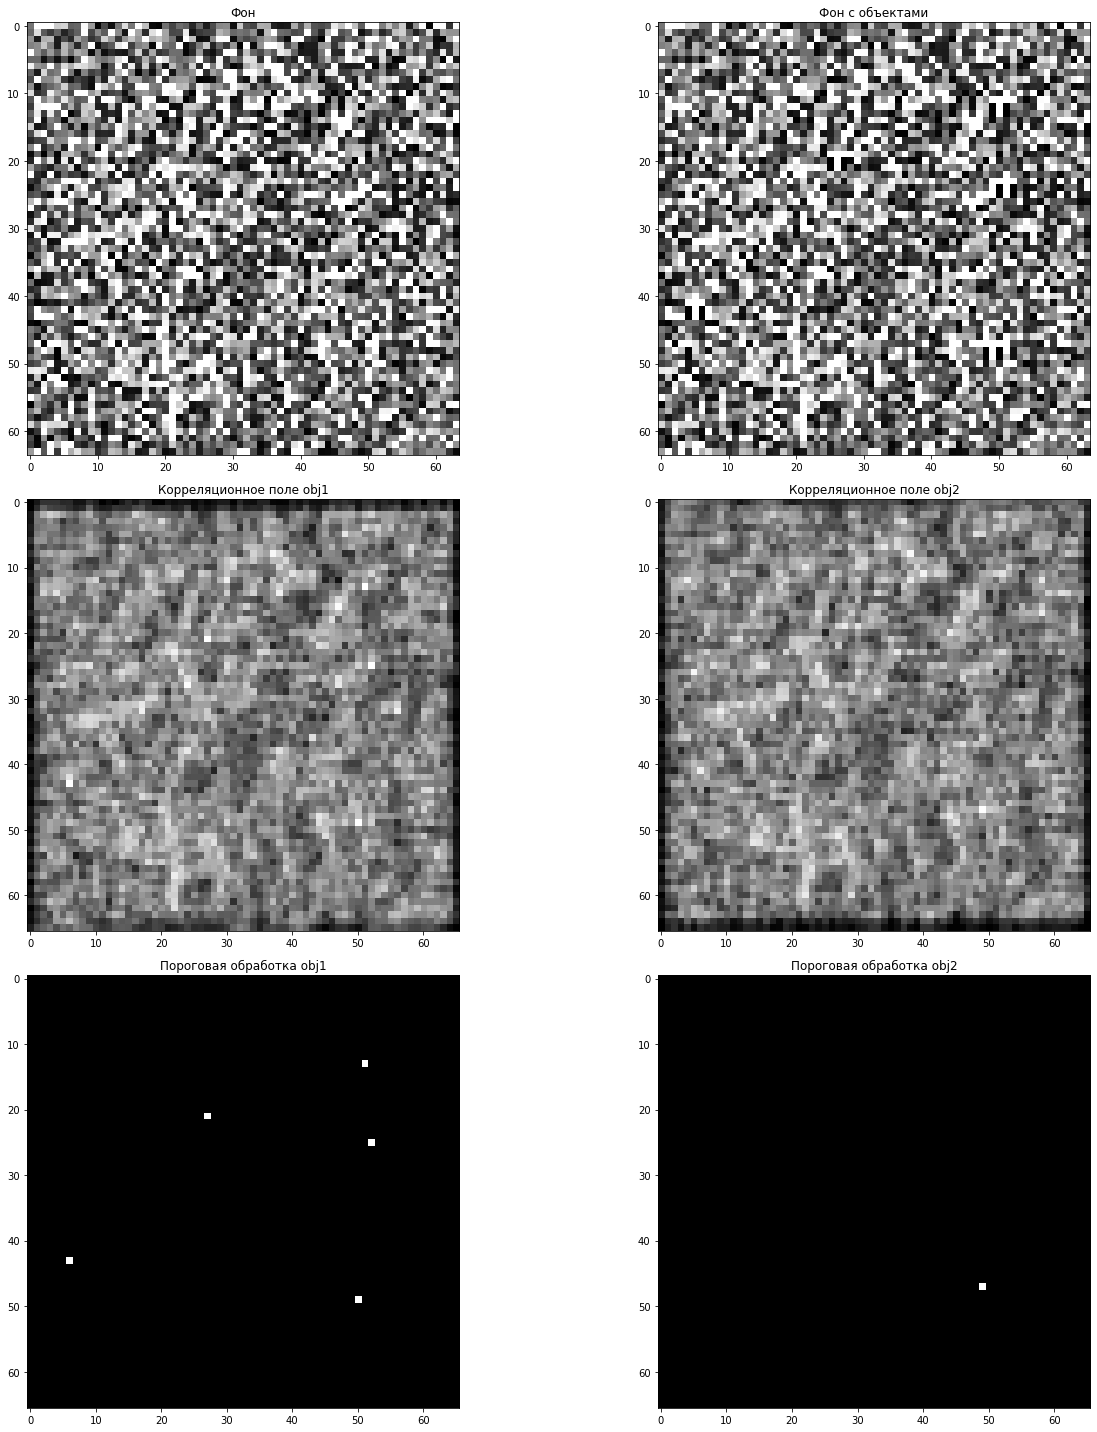

In [75]:
fig = plt.figure(figsize=(20, 20))
axes=np.zeros((3,2),dtype=object)
axes[0,0]=fig.add_subplot(321)
axes[0,1]=fig.add_subplot(322)
axes[1,0]=fig.add_subplot(323)
axes[1,1]=fig.add_subplot(324)
axes[2,0]=fig.add_subplot(325)
axes[2,1]=fig.add_subplot(326)

ax_img=plot_img(noise_img,axes[0,0])
ax_img.set_title("Фон")

ax_img=plot_img(noise_with_obj,axes[0,1])
ax_img.set_title("Фон c объектами")

ax_img=plot_img(corr_obj1,axes[1,0])
ax_img.set_title("Корреляционное поле obj1")
ax_img=plot_img(treshhold_obj1,axes[2,0])
ax_img.set_title("Пороговая обработка obj1")

ax_img=plot_img(corr_obj2,axes[1,1])
ax_img.set_title("Корреляционное поле obj2")
ax_img=plot_img(treshhold_obj2,axes[2,1])
ax_img.set_title("Пороговая обработка obj2")

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

## 3) Есть объекты двух типов.

In [76]:
noise_with_obj=apply_a_mask(noise_img.copy(),obj1,3)
noise_with_obj=apply_a_mask(noise_with_obj.copy(),obj2,3)

corr_obj1=signal.correlate2d(noise_with_obj.copy(), obj1, boundary='fill', mode='full')
corr_obj2=signal.correlate2d(noise_with_obj.copy(), obj2, boundary='fill', mode='full')

treshhold_obj1=np.where(corr_obj1.copy() >= 5, 255, 0)
treshhold_obj2=np.where(corr_obj2.copy() >= 5, 255, 0)

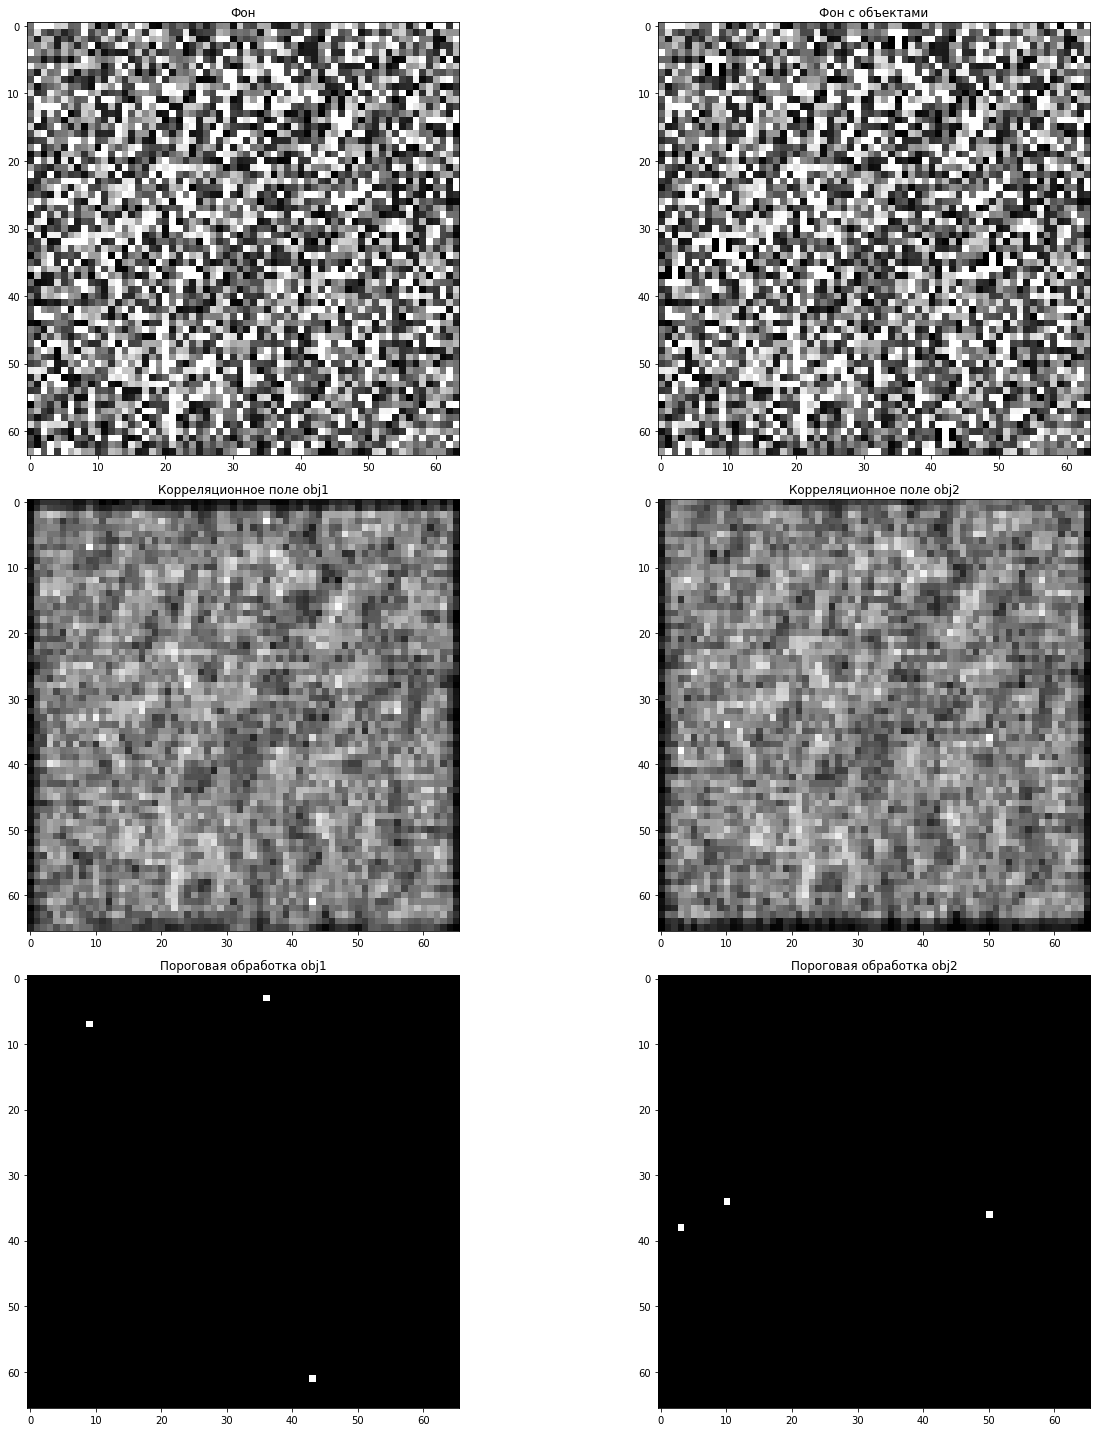

In [77]:
fig = plt.figure(figsize=(20, 20))
axes=np.zeros((3,2),dtype=object)
axes[0,0]=fig.add_subplot(321)
axes[0,1]=fig.add_subplot(322)
axes[1,0]=fig.add_subplot(323)
axes[1,1]=fig.add_subplot(324)
axes[2,0]=fig.add_subplot(325)
axes[2,1]=fig.add_subplot(326)

ax_img=plot_img(noise_img,axes[0,0])
ax_img.set_title("Фон")

ax_img=plot_img(noise_with_obj,axes[0,1])
ax_img.set_title("Фон c объектами")

ax_img=plot_img(corr_obj1,axes[1,0])
ax_img.set_title("Корреляционное поле obj1")
ax_img=plot_img(treshhold_obj1,axes[2,0])
ax_img.set_title("Пороговая обработка obj1")

ax_img=plot_img(corr_obj2,axes[1,1])
ax_img.set_title("Корреляционное поле obj2")
ax_img=plot_img(treshhold_obj2,axes[2,1])
ax_img.set_title("Пороговая обработка obj2")

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()